# Detecting Diabetes using Multi Layer Perceptron

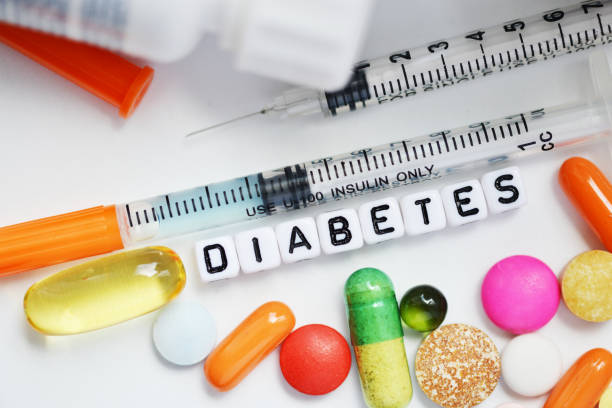

###### In 2021, 537 million adults (20-79 years) had diabetes, which is 1 in 10 people.

**We all know that Diabetes is a Leading Cause of Blindness Worldwide. Adults with Diabetes Are Twice as Likely to Die from Heart Disease or Stroke. Many Early Symptoms of Diabetes Are Too Mild to Notice. Half of All Those with Diabetes Are Undiagnosed**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [9]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [10]:
df['Glucose'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

In [11]:
df['BMI'].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [12]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Our all features are in integer/float datatypes**

In [15]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

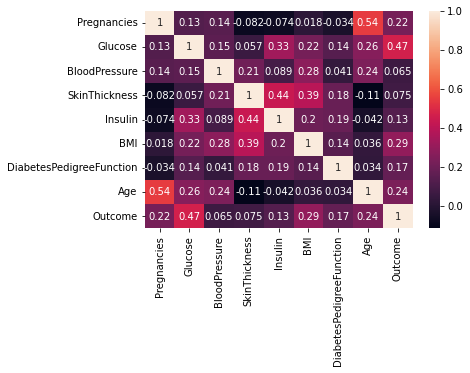

In [16]:
sns.heatmap(df.corr(),annot=True)

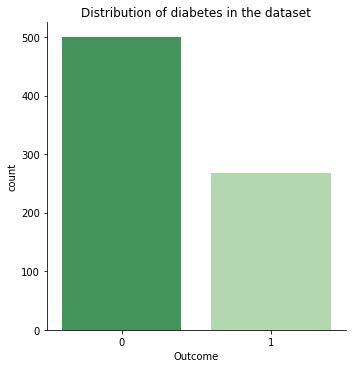

In [17]:
sns.catplot(x='Outcome', kind="count", palette="Greens_r", data=df)

import matplotlib.pyplot as plt
plt.title('Distribution of diabetes in the dataset')

plt.show()

**We can see that over 500 people do not have diabates and nearby 280 have diabates**

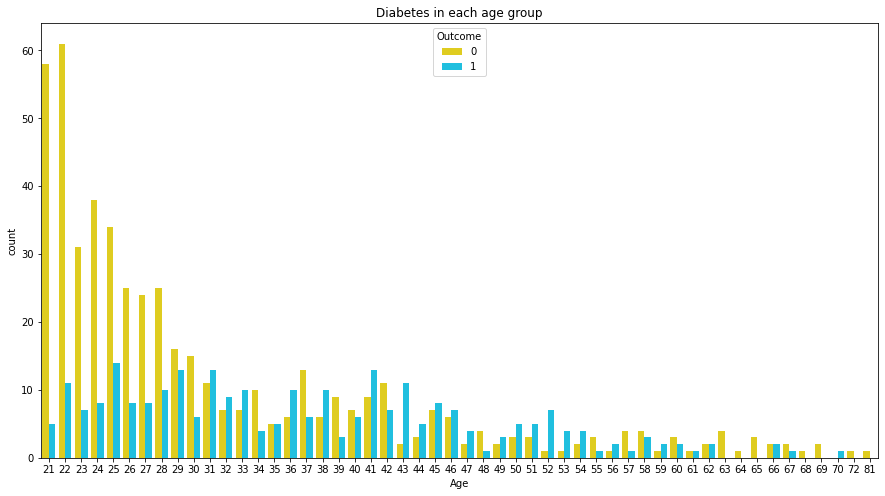

In [18]:
#Plot the distribution of diabetes within the age group attribute
plt.figure(figsize=(15, 8))
sns.countplot(x ='Age', hue = 'Outcome', data = df, palette = 'jet_r')
plt.title('Diabetes in each age group')
plt.show()

In [19]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=11)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [22]:
X_train_trf = sc.fit_transform(X_train)
X_test_trf = sc.transform(X_test)

In [23]:
X_train_trf.shape

(614, 8)

In [24]:
X_test_trf.shape

(154, 8)

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [64]:
model = Sequential()

In [65]:
model.add(Dense(4,activation='sigmoid',input_dim=8))
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
history = model.fit(X_train_trf,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.25)

Epoch 1/100
10/10 [==============================] - 1s 38ms/step - loss: 0.5107 - accuracy: 0.7696 - val_loss: 0.5593 - val_accuracy: 0.7468
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5095 - accuracy: 0.7717 - val_loss: 0.5575 - val_accuracy: 0.7468
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5084 - accuracy: 0.7761 - val_loss: 0.5564 - val_accuracy: 0.7468
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5073 - accuracy: 0.7804 - val_loss: 0.5554 - val_accuracy: 0.7468
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 0.5065 - accuracy: 0.7804 - val_loss: 0.5532 - val_accuracy: 0.7468
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5055 - accuracy: 0.7870 - val_loss: 0.5523 - val_accuracy: 0.7468
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5047 - accuracy: 0.7848 - val_loss: 0.5503 - val_accuracy: 0.7468
Epoch 8/1

10/10 [==============================] - 0s 7ms/step - loss: 0.4810 - accuracy: 0.7848 - val_loss: 0.5106 - val_accuracy: 0.7727
Epoch 59/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4807 - accuracy: 0.7826 - val_loss: 0.5090 - val_accuracy: 0.7727
Epoch 60/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4803 - accuracy: 0.7826 - val_loss: 0.5092 - val_accuracy: 0.7727
Epoch 61/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4801 - accuracy: 0.7870 - val_loss: 0.5092 - val_accuracy: 0.7727
Epoch 62/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4798 - accuracy: 0.7870 - val_loss: 0.5082 - val_accuracy: 0.7727
Epoch 63/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4795 - accuracy: 0.7870 - val_loss: 0.5076 - val_accuracy: 0.7727
Epoch 64/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4793 - accuracy: 0.7826 - val_loss: 0.5061 - val_accuracy: 0.7727
Epoch 65/100
10/10

In [34]:
model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


array([[0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.588

In [35]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 5ms/step


In [36]:
y_pred

array([[0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.58888113],
       [0.588

In [37]:
y_pred = y_pred.argmax(axis=-1)

In [38]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6493506493506493

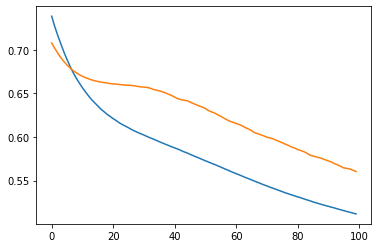

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

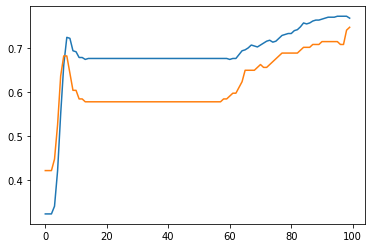

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [42]:
print(confusion_matrix(y_test,y_pred))  

[[100   0]
 [ 54   0]]


In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154



c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

***Conclusion:***